In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data_origin.csv").select_dtypes(include=np.number).drop(columns=['Unnamed: 0'])
df.drop
df.head()

,Price,Model Year,Mileage,Engine Capacity
0,2385000,2017,9869,1000
1,111000,2019,11111,1300
2,1530000,2019,17500,660
3,1650000,2019,9600,660
4,1435000,2010,120000,1300


In [4]:
print(round(df.describe(),2).to_string())

             Price  Model Year    Mileage  Engine Capacity
count     46022.00    46022.00   46022.00         46022.00
mean    2014153.23     2011.04   90965.13          1313.12
std     2939071.19        6.40   63656.66           614.69
min      111000.00     1990.00       1.00            16.00
25%      850000.00     2007.00   48899.50          1000.00
50%     1450000.00     2013.00   80000.00          1300.00
75%     2300000.00     2016.00  120000.00          1500.00
max    77500000.00     2019.00  999999.00          6600.00


In [5]:
df_full = pd.read_csv("data_origin.csv").drop(columns=['Unnamed: 0','Location'])
df_full.columns

Index(['Company Name', 'Model Name', 'Price', 'Model Year', 'Mileage',
       'Engine Type', 'Engine Capacity', 'Color', 'Assembly', 'Body Type',
       'Transmission Type', 'Registration Status'],
      dtype='object')

Bảng tần suất của thuộc tính 'Company Name':
Company Name
Suzuki        15944
Toyota        15560
Honda          9245
Daihatsu       2281
Nissan          575
Mitsubishi      498
Mercedes        435
Hyundai         360
Audi            208
FAW             187
BMW             137
Mazda           120
KIA              81
Lexus            81
United           64
Subaru           58
Daewoo           48
Chevrolet        40
Range            33
SsangYong        13
Land             10
DFSK              9
Porsche           8
Chery             8
Jeep              6
MINI              5
Fiat              4
Hummer            1
Jaguar            1
Adam              1
Volvo             1
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_23736\387036370.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


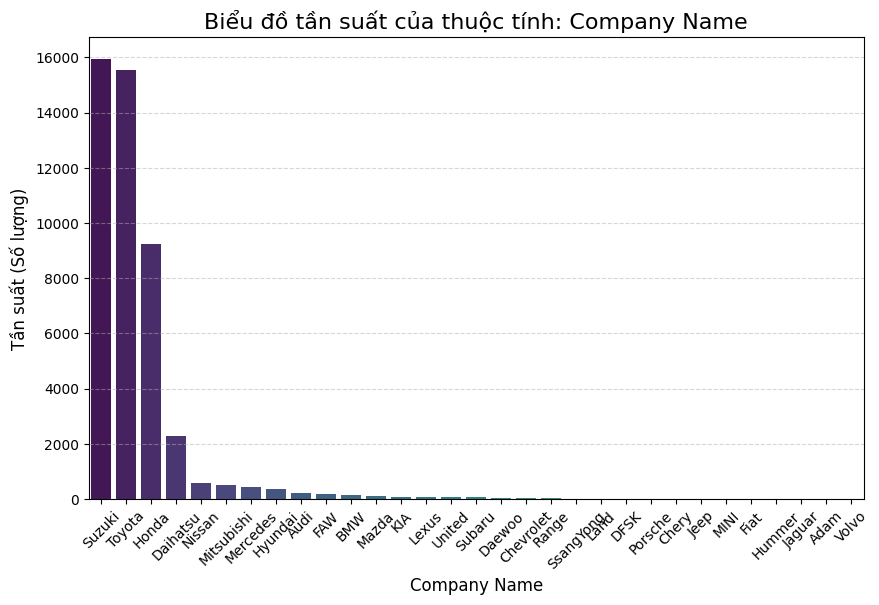

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Company Name'

#đếm số lần xuất hiện 
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,       
    data=df_full,
    order=frequency_counts.index, 
    palette='viridis'       
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Model Name':
Model Name
Corolla    8198
Mehran     4766
Civic      4214
Cultus     3645
City       3109
           ... 
A7            1
X3            1
S40           1
Ractis        1
CJ            1
Name: count, Length: 196, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_23736\593538270.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


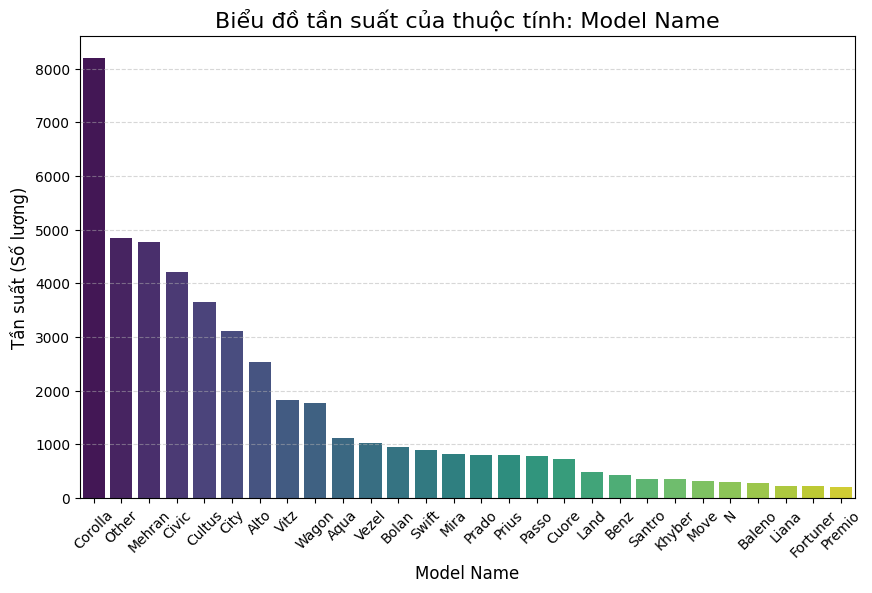

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Model Name'


print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# Ví dụ: Giả sử df['Brand'] có rất nhiều thương hiệu nhỏ
THRESHOLD = 200  # Ngưỡng: Hợp nhất các thương hiệu có dưới 1000 xe

# 1. Lấy danh sách các hạng mục chính (Major Categories)
major_categories = df_full[attribute_name].value_counts()[df_full[attribute_name].value_counts() >= THRESHOLD].index

# 2. Tạo cột mới (hoặc ghi đè cột cũ)
# Thay thế tất cả các giá trị KHÔNG nằm trong major_categories bằng 'Other'
df_full['Model_Name_Grouped'] = df_full[attribute_name].apply(lambda x: x if x in major_categories else 'Other')

new_frequency_counts = df_full['Model_Name_Grouped'].value_counts()
# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x='Model_Name_Grouped',       
    data=df_full,
    order=new_frequency_counts.index, 
    palette='viridis'       
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Engine Type':
Engine Type
Petrol    43590
Hybrid     1439
Diesel      993
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_23736\2334570783.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


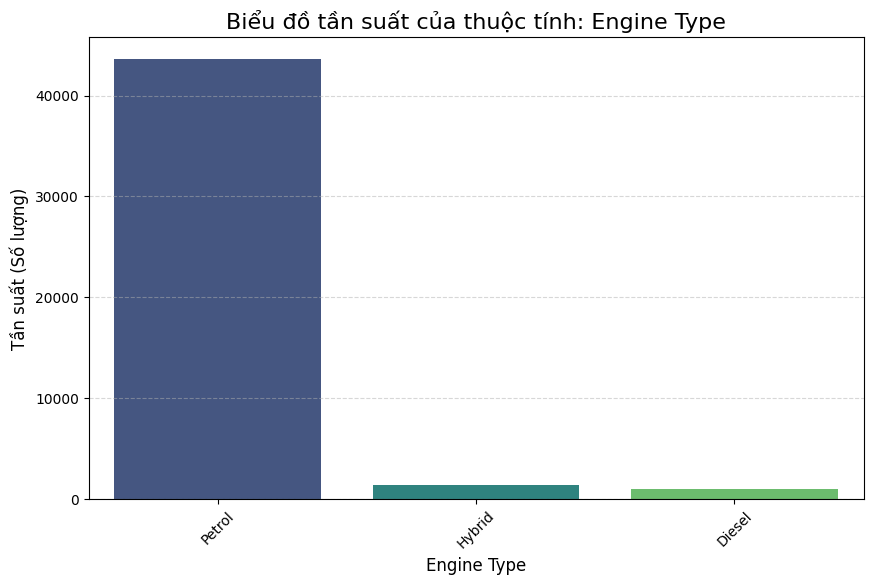

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Engine Type'

#đếm số lần xuất hiện 
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,       
    data=df_full,
    order=frequency_counts.index, 
    palette='viridis'       
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Color':
Color
White        17588
Silver        8006
Black         6026
Grey          5038
Blue          2127
Assembly      1382
Gold          1003
Maroon         924
Red            822
Green          770
Beige          580
Burgundy       307
Brown          269
Turquoise      230
Bronze         211
Pink           194
Navy           120
Unlisted       109
Yellow          98
Purple          90
Indigo          85
Orange          40
Magenta          2
Wine             1
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_15456\1162244634.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


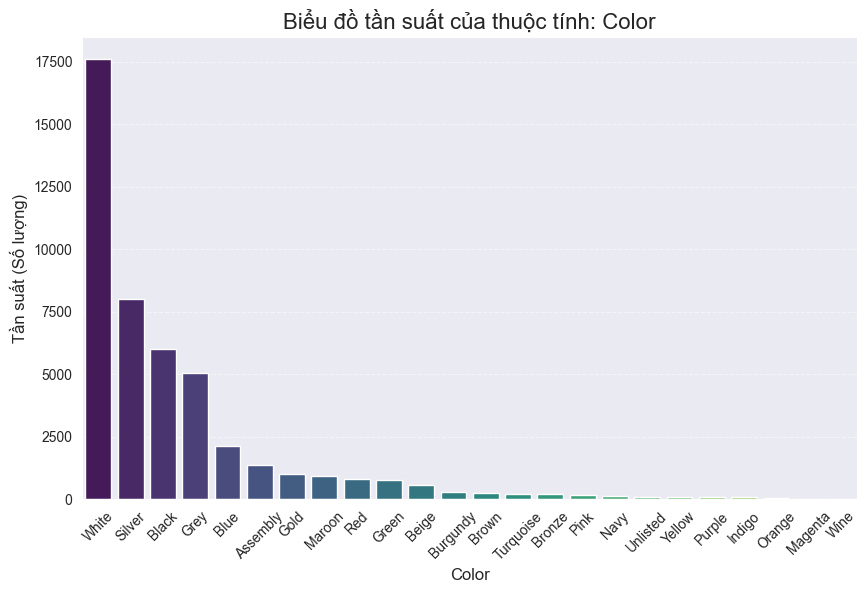

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Color'

#đếm số lần xuất hiện
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,
    data=df_full,
    order=frequency_counts.index,
    palette='viridis'       
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Assembly':
Assembly
Local       31210
Imported    14812
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_15456\662022704.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


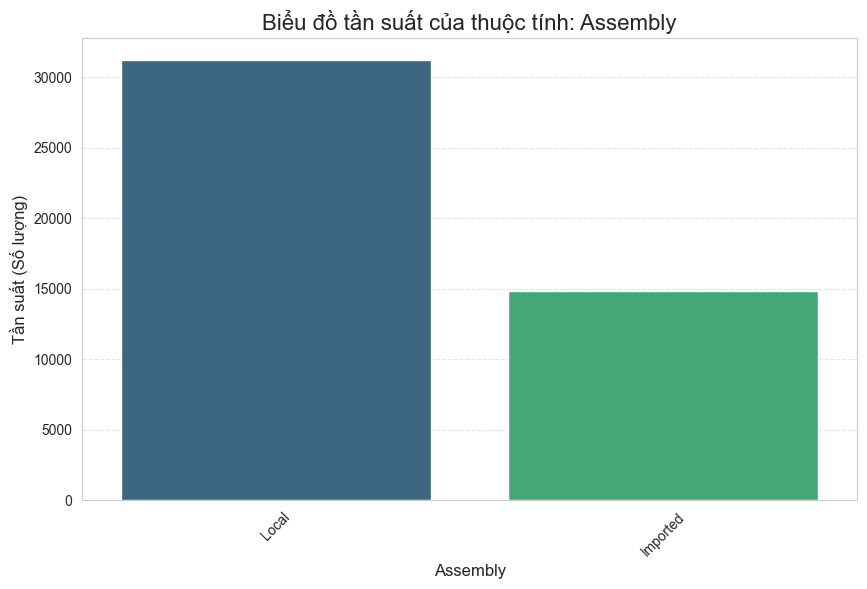

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Assembly'

#đếm số lần xuất hiện
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,
    data=df_full,
    order=frequency_counts.index,
    palette='viridis'
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Body Type':
Body Type
Hatchback     21576
Sedan         18984
SUV            2390
Mini Van       1199
Cross Over     1182
Van             691
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_15456\1207040415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


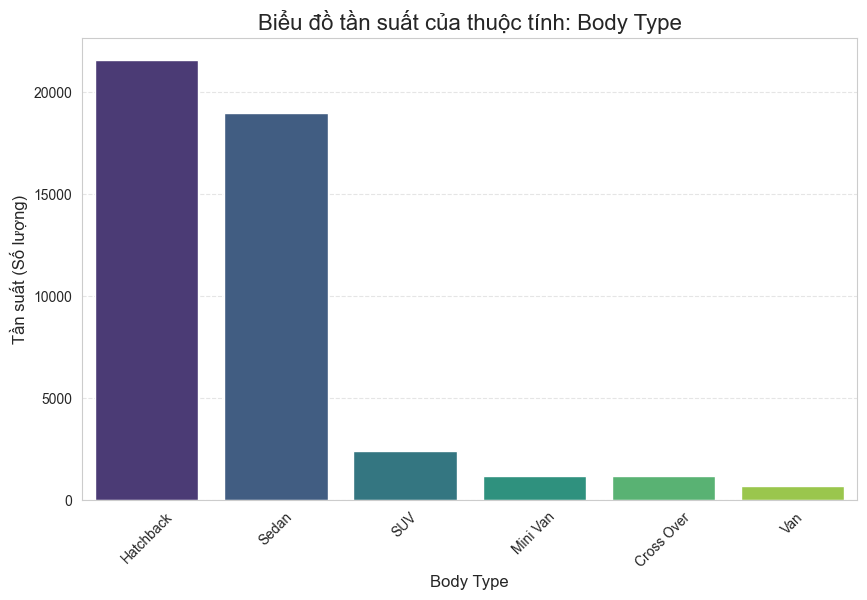

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Body Type'

#đếm số lần xuất hiện
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,
    data=df_full,
    order=frequency_counts.index,
    palette='viridis'
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Transmission Type':
Transmission Type
Manual       24611
Automatic    21411
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_15456\2637930062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


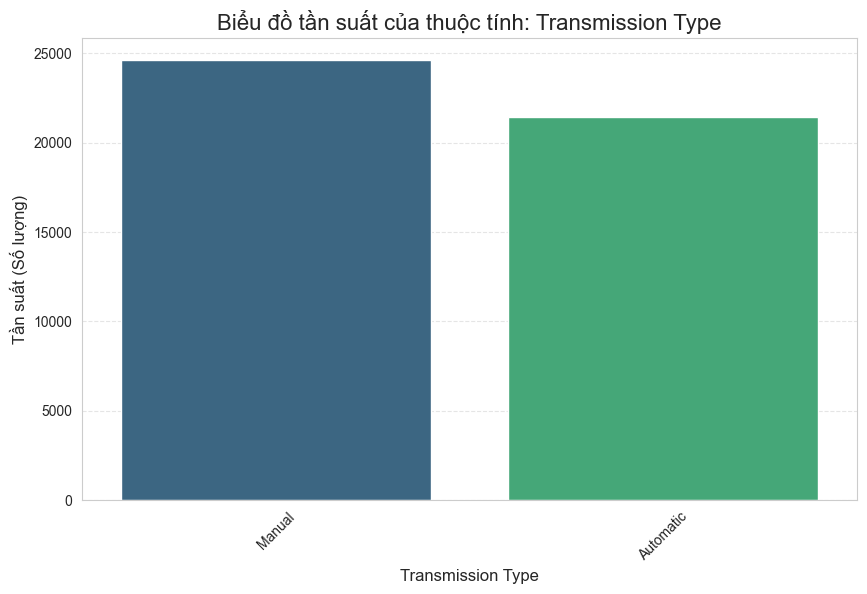

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Transmission Type'

#đếm số lần xuất hiện
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,
    data=df_full,
    order=frequency_counts.index,
    palette='viridis'
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Bảng tần suất của thuộc tính 'Registration Status':
Registration Status
Registered       42693
Un-Registered     3329
Name: count, dtype: int64


C:\Users\buibo\AppData\Local\Temp\ipykernel_15456\4088217143.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


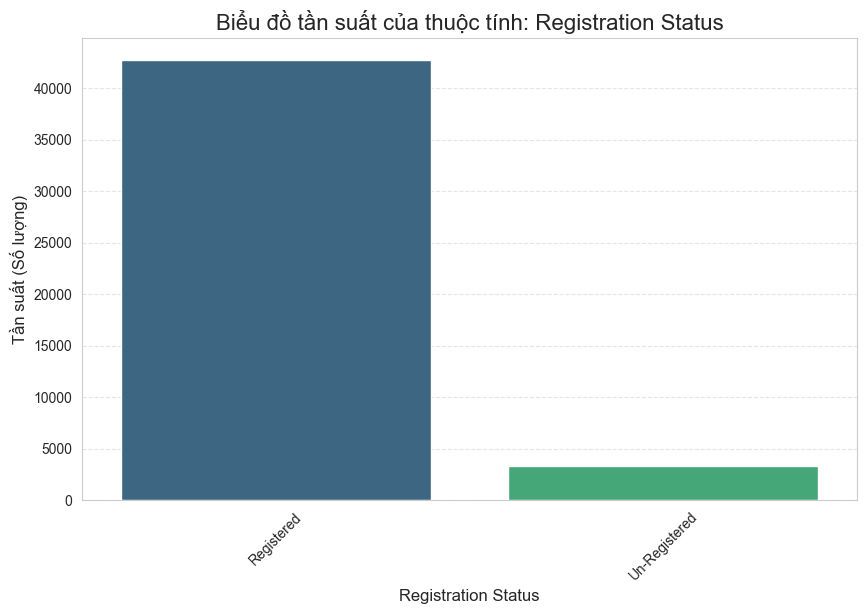

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cột muốn vẽ
attribute_name = 'Registration Status'

#đếm số lần xuất hiện
frequency_counts = df_full[attribute_name].value_counts()

print(f"Bảng tần suất của thuộc tính '{attribute_name}':")
print(frequency_counts)

# 4. VẼ BIỂU ĐỒ CỘT (BAR CHART)
plt.figure(figsize=(10, 6))

sns.countplot(
    x=attribute_name,
    data=df_full,
    order=frequency_counts.index,
    palette='viridis'
)

plt.title(f'Biểu đồ tần suất của thuộc tính: {attribute_name}', fontsize=16)
plt.xlabel(attribute_name, fontsize=12)
plt.ylabel('Tần suất (Số lượng)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

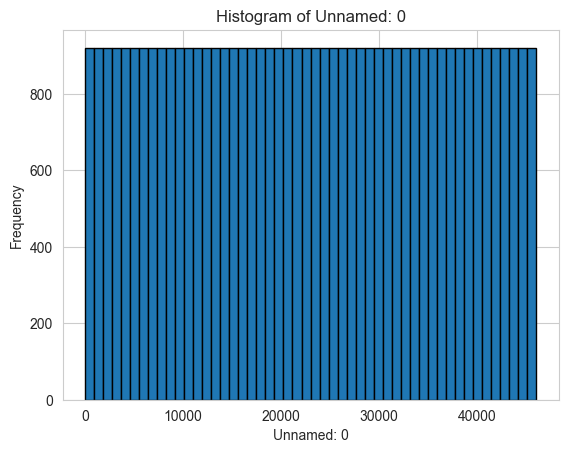

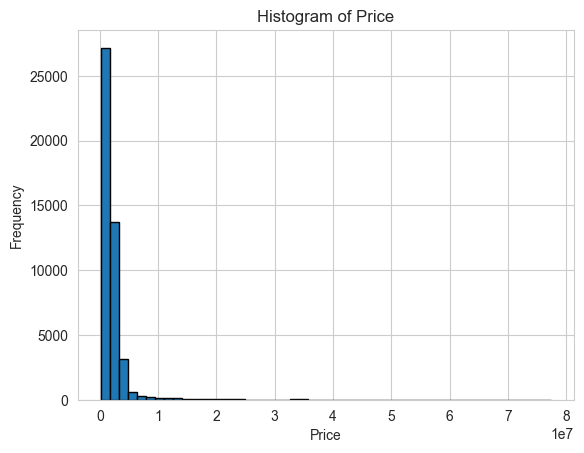

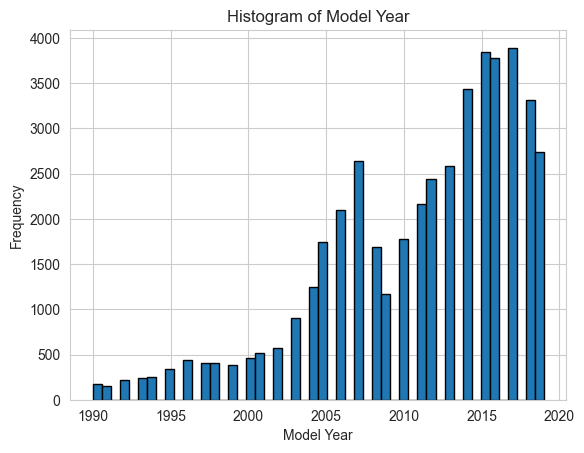

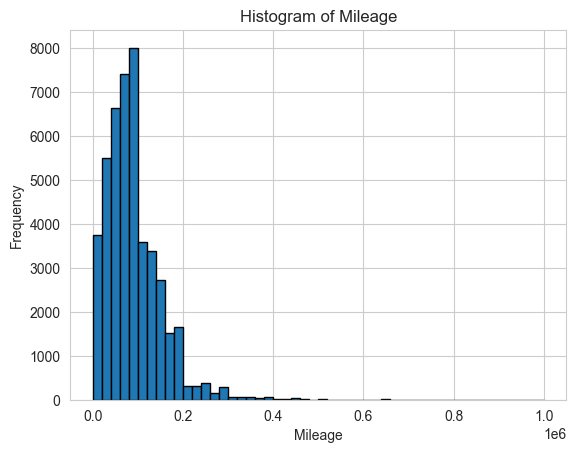

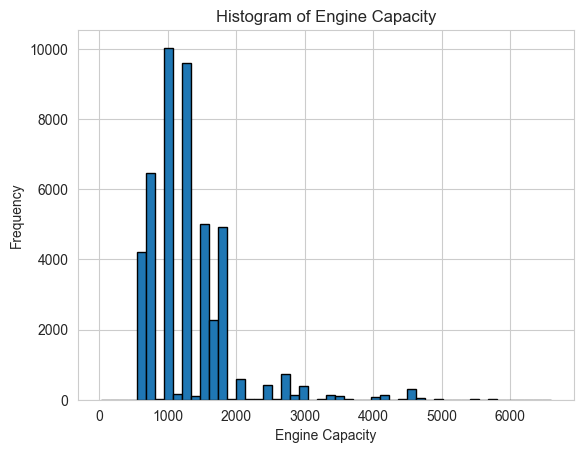

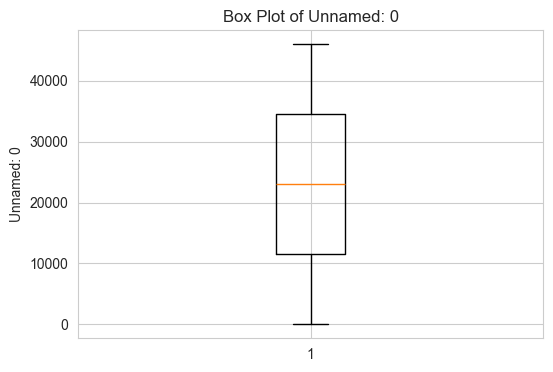

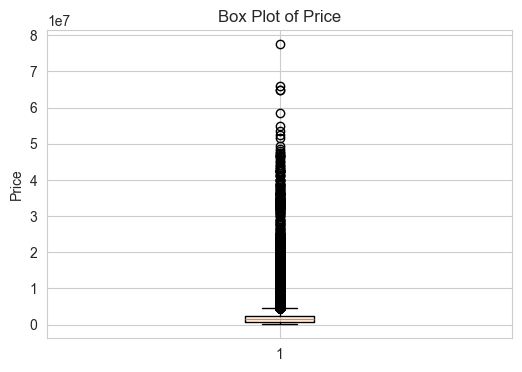

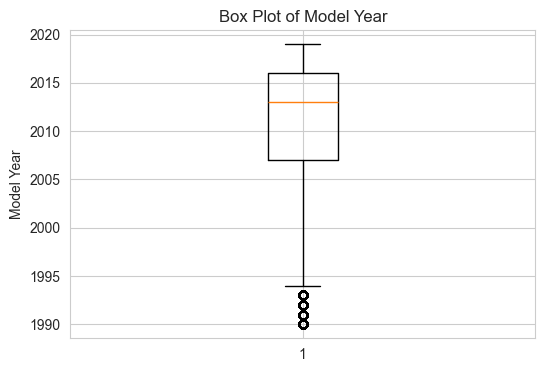

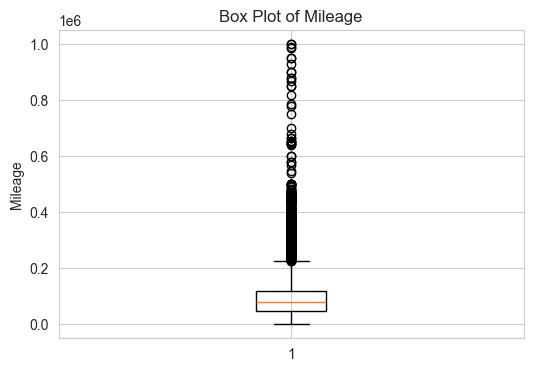

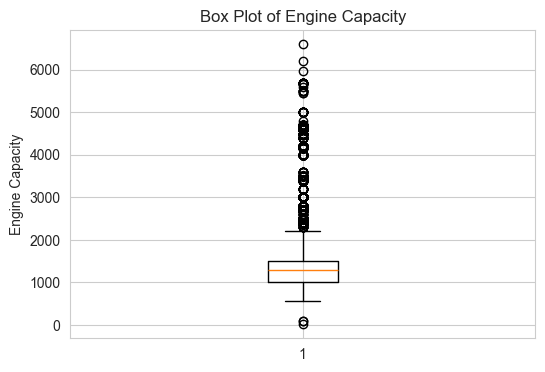

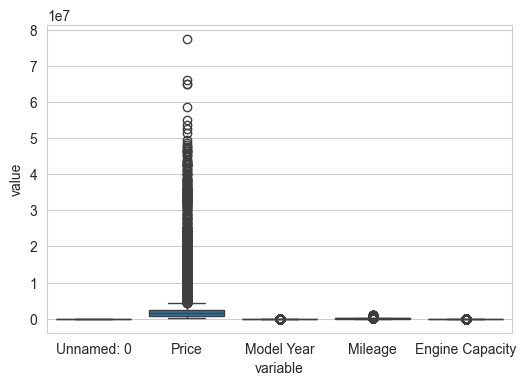

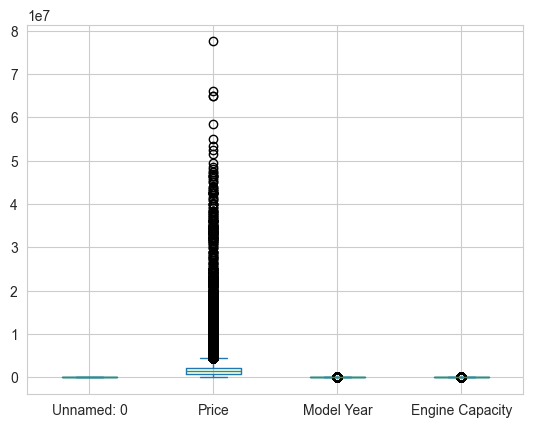

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data_origin.csv')

# # Lặp qua từng cột của DataFrame và vẽ histogram cho các cột kiểu nguyên
# for column in df.select_dtypes(include=['int64']):
#     plt.hist(df[column], bins=50, edgecolor='k')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()


# Để vẽ biểu đồ hộp, ta cần đưa dữ liệu về dạng số
#  Chọn các cột dữ liệu số (numeric columns)
df_numeric = df.select_dtypes(include=['number'])

# for column in df_numeric.columns:
#     plt.figure(figsize=(6, 4))  # Kích thước của biểu đồ
#     plt.boxplot(df[column])
#     plt.title(f'Box Plot of {column}')
#     plt.ylabel(column)
#     plt.grid(True)
#     plt.show()

#Vẽ nhiều cột trên một đồ thị, bằng seaborn
plt.figure(figsize=(6, 4))  # Kích thước của biểu đồ
sns.boxplot(x="variable", y="value", data=pd.melt(df_numeric))
plt.show()



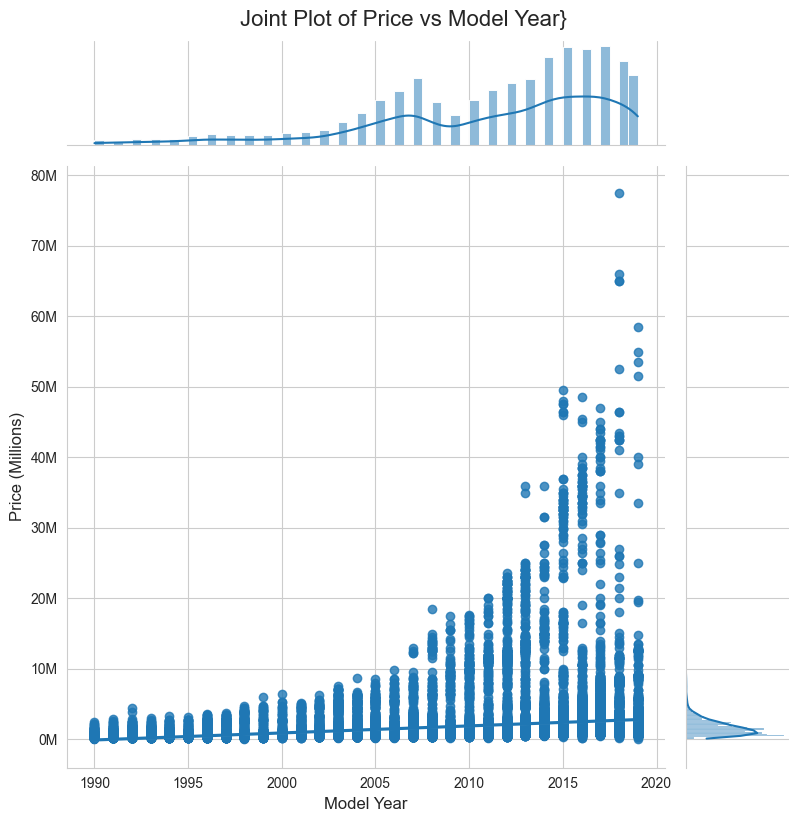


Hệ số tương quan Pearson giữa Price và Model Year: 0.2175


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
x_label = "Model Year"

g = sns.jointplot(
    data=df,
    x=x_label,
    y='Price',
    kind='reg',
    height=8,
    ratio=5,
)

g.fig.suptitle('Joint Plot of Price vs Model Year}', y=1.02, fontsize=16)

def format_price(x, pos):
    return f'{x/1000000:.0f}M'

g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(format_price))
g.ax_joint.set_ylabel("Price (Millions)", fontsize=12)
g.ax_joint.set_xlabel(x_label, fontsize=12)
g.ax_joint.ticklabel_format(style='plain', axis='x')

plt.show()

correlation = df['Price'].corr(df[x_label])
print(f"\nHệ số tương quan Pearson giữa Price và {x_label}: {correlation:.4f}")

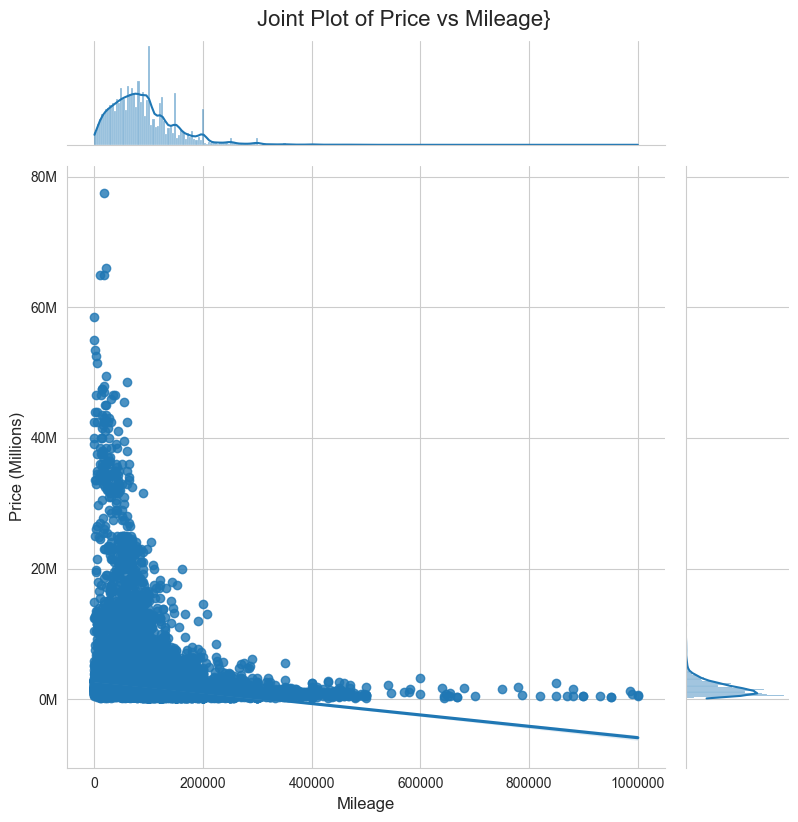

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
x_label = "Mileage"


g = sns.jointplot(
    data=df,
    x=x_label,
    y='Price',
    kind='reg',
    height=8,
    ratio=5,
)

g.fig.suptitle('Joint Plot of Price vs Mileage}', y=1.02, fontsize=16)

def format_price(x, pos):
    return f'{x/1000000:.0f}M'

g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(format_price))
g.ax_joint.set_ylabel("Price (Millions)", fontsize=12)
g.ax_joint.set_xlabel(x_label, fontsize=12)
g.ax_joint.ticklabel_format(style='plain', axis='x')

plt.show()

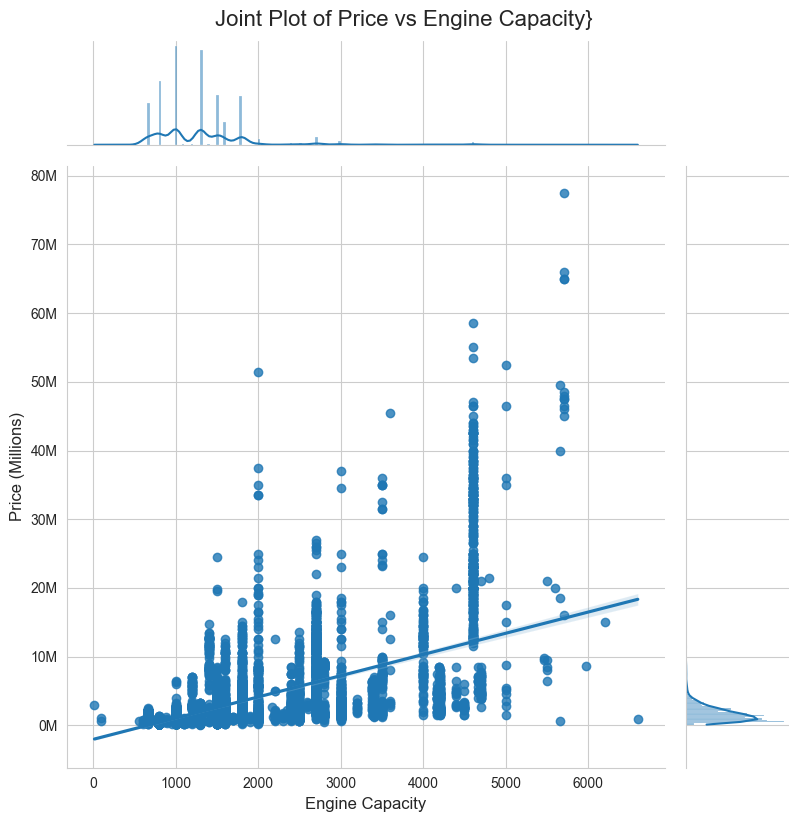

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
x_label = "Engine Capacity"


g = sns.jointplot(
    data=df,
    x=x_label,
    y='Price',
    kind='reg',
    height=8,
    ratio=5,
)

g.fig.suptitle('Joint Plot of Price vs Engine Capacity}', y=1.02, fontsize=16)

def format_price(x, pos):
    return f'{x/1000000:.0f}M'

g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(format_price))
g.ax_joint.set_ylabel("Price (Millions)", fontsize=12)
g.ax_joint.set_xlabel(x_label, fontsize=12)
g.ax_joint.ticklabel_format(style='plain', axis='x')

plt.show()

In [ ]:
"""Index(['Company Name', 'Model Name', 'Price', 'Model Year', 'Mileage',
       'Engine Type', 'Engine Capacity', 'Color', 'Assembly', 'Body Type',
       'Transmission Type', 'Registration Status'],"""
# Thiết lập phong cách đồ thị

# Giới hạn giá trị để dễ hình dung
df_full['Price'] = np.clip(df_full['Price'], a_min=100000, a_max=30000000)

# Chuyển Price sang triệu để dễ đọc hơn
df_full['Price_M'] = df_full['Price'] / 1000000

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Lệnh vẽ Violin Plot chính
sns.violinplot(
    x='Company Name',
    y='Price',
    data=df_full,
    palette='Pastel1',
    inner='quartile',
    linewidth=1.5
)

# --- 3. Tùy chỉnh Đồ thị ---

plt.title('Phân bố Giá (Price) theo Loại Nhiên liệu (Company Name)', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Điều chỉnh các nhãn trục y để hiển thị rõ ràng hơn
# plt.yticks(np.arange(0, df['Price'].max() + 5, 5))

# Hiển thị đồ thị
plt.show()

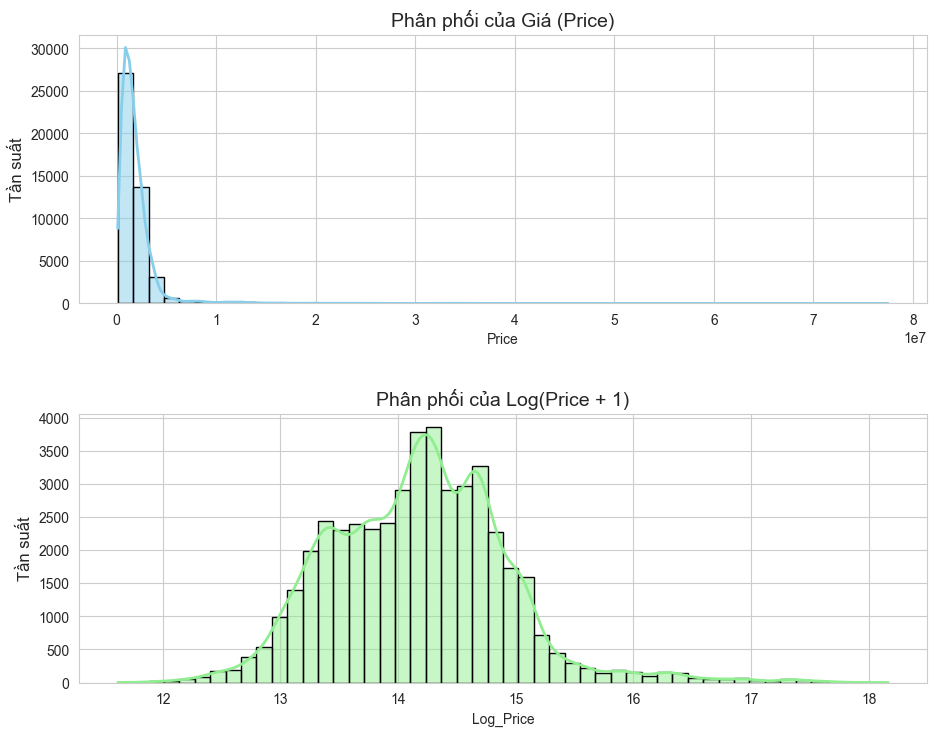

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_full['Log_Price'] = np.log1p(df_full['Price'])

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8)) # Tạo 2 subplot trong 1 cột

# --- Hình 3.39: Phân phối của Giá (Price) Gốc ---
sns.histplot(
    df_full['Price'],
    ax=axes[0],
    kde=True,
    bins=50, # Số lượng bins (thanh cột)
    color='skyblue',
    edgecolor='black',
    line_kws={'lw': 2, 'color': 'skyblue'} # Tùy chỉnh đường KDE
)
axes[0].set_title('Phân phối của Giá (Price)', fontsize=14)
axes[0].set_ylabel('Tần suất', fontsize=12)
# Định dạng trục x để dễ đọc hơn (ví dụ: hiển thị triệu)
# axes[0].ticklabel_format(style='plain', axis='x')
# Nếu bạn muốn đơn vị là USD như trong hình, hãy giữ nguyên đơn vị.

# --- Hình 3.40: Phân phối của Log(Price + 1) ---
sns.histplot(
    df_full['Log_Price'],
    ax=axes[1],
    kde=True,
    bins=50,
    color='lightgreen',
    edgecolor='black',
    line_kws={'lw': 2, 'color': 'lightgreen'}
)
axes[1].set_title('Phân phối của Log(Price + 1)', fontsize=14)
axes[1].set_ylabel('Tần suất', fontsize=12)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.tight_layout(pad=3.0)
plt.show()

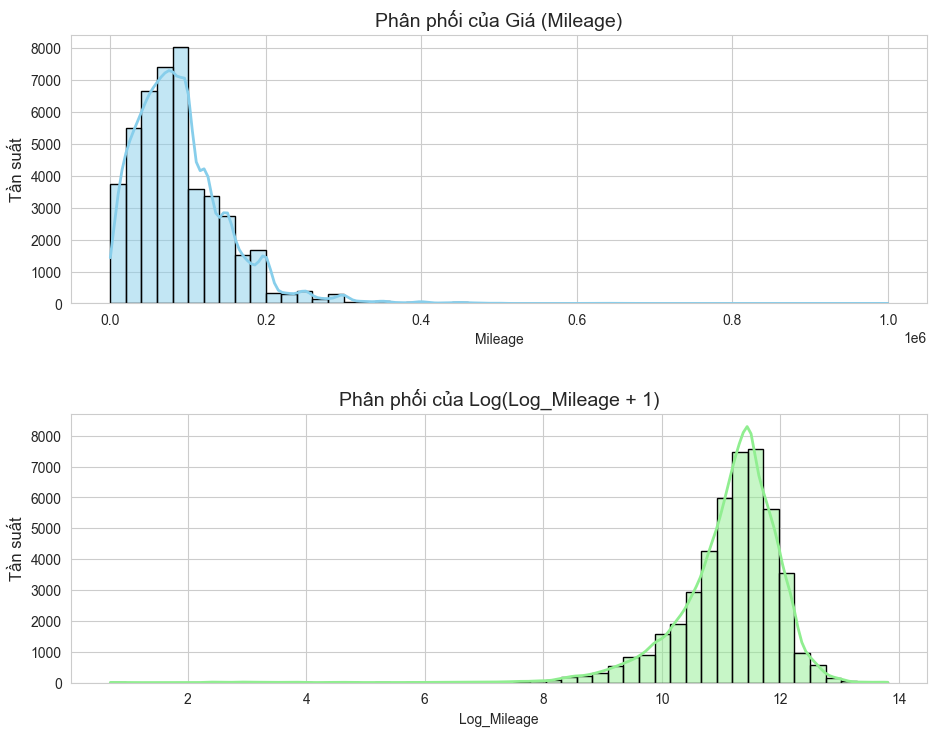

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_full['Log_Mileage'] = np.log1p(df_full['Mileage'])

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8)) # Tạo 2 subplot trong 1 cột

# --- Hình 3.39: Phân phối của Giá (Price) Gốc ---
sns.histplot(
    df_full['Mileage'],
    ax=axes[0],
    kde=True,
    bins=50, # Số lượng bins (thanh cột)
    color='skyblue',
    edgecolor='black',
    line_kws={'lw': 2, 'color': 'skyblue'} # Tùy chỉnh đường KDE
)
axes[0].set_title('Phân phối của Giá (Mileage)', fontsize=14)
axes[0].set_ylabel('Tần suất', fontsize=12)
# Định dạng trục x để dễ đọc hơn (ví dụ: hiển thị triệu)
# axes[0].ticklabel_format(style='plain', axis='x')
# Nếu bạn muốn đơn vị là USD như trong hình, hãy giữ nguyên đơn vị.

# --- Hình 3.40: Phân phối của Log(Price + 1) ---
sns.histplot(
    df_full['Log_Mileage'],
    ax=axes[1],
    kde=True,
    bins=50,
    color='lightgreen',
    edgecolor='black',
    line_kws={'lw': 2, 'color': 'lightgreen'}
)
axes[1].set_title('Phân phối của Log(Log_Mileage + 1)', fontsize=14)
axes[1].set_ylabel('Tần suất', fontsize=12)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.tight_layout(pad=3.0)
plt.show()